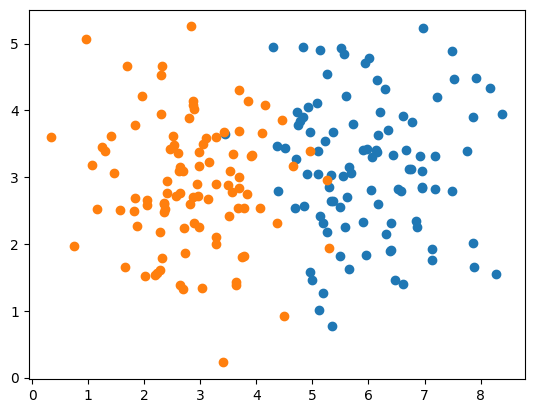

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(0)

# parameters
n_dim = 2
centers = [[6, 3], [3, 3]]
std_dev = 1.0
n_points = 100

classes = [np.random.normal(loc=np.array(centers[i]), scale=std_dev, size=(n_points, n_dim)) for i in range(len(centers))]

# add a point in 2,2
#classes.append(np.array([[1, 1]]))

# add a point in 6,6
#classes.append(np.array([[7, 7]]))

# Plot the data
plt.figure()
for i in classes:
    plt.scatter(i[:, 0], i[:, 1])

In [2]:
# Create a DataFrame with a column for the x values, a column for the y values, and a column for the class
df = pd.DataFrame(np.concatenate(classes), columns=['x', 'y'])
df['class'] = [0] * n_points + [1] * n_points #+ [2] + [3]

In [3]:
# shuffle
df = df.sample(frac=1).reset_index(drop=True)
df

,x,y,class
0,8.269755,1.545634,0
1,3.274516,2.109085,1
2,6.066517,3.302472,0
3,4.774564,3.844363,0
4,5.196590,2.310450,0
...,...,...,...
195,2.881836,2.319822,1
196,4.369802,3.462782,0
197,4.494485,0.930015,1
198,6.154947,3.378163,0


In [4]:
# Save the data
df.to_csv('easy_synth_data.csv', index=False)